In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

В проекте module_2 предстоит провести разведывательный анализ данных для того, чтобы отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

До начала работы с файлом импортируем все необходимые библиотеки. После импортируем файл и посмотрим его содержание. 

In [2]:
stud = pd.read_csv('stud_math.csv')
display(stud.head(20))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Изучим столбцы. При необходимости проведем замены пропусков или удалим их.

In [3]:
stud.school.value_counts(dropna=False)  # Название школы, пропусков нет

GP    349
MS     46
Name: school, dtype: int64

In [4]:
stud.sex.value_counts(dropna=False) # Пол учащегося, пропусков нет

F    208
M    187
Name: sex, dtype: int64

In [5]:
stud.age.value_counts(dropna=False) #Возраст учащегося, пропусков нет. 

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


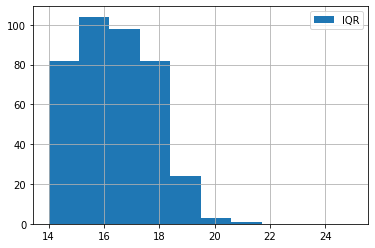

In [6]:
#Произведем проверку на выбросы
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.age.loc[stud.age.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(range = (14, 25), label = 'IQR')
 
plt.legend()

In [7]:
# После проверки на выбросы решаю убрать из датасета не только учащегося в возрасте 22, но и учащегося в возрасте 21 год, 
#так как он находится на границе выброса и всего один. Сделаю позже
#stud = stud.loc[stud.age <= 20]

In [8]:
# Место проживания учащегося. Есть 17 пропусков. Преобладает проживание в городе.
stud.address.value_counts(dropna=False)

U      295
R       83
NaN     17
Name: address, dtype: int64

In [9]:
# Заменим пропуски поровну U и R
display(stud.address.unique())
# часть таблицы для демонстрации значений
display(stud[(stud.index > 40) & (stud.index < 70)])
nan_index_1 = stud[pd.isna(stud.address)].index
for i in range(2):
    for index in nan_index_1[i::2]:
        if i == 0:
            stud.iat[index, 3] = 'U'
        else:
            stud.iat[index, 3] = 'R'
display(stud.address.unique())
display(stud[(stud.index > 40) & (stud.index < 70)])

array(['U', nan, 'R'], dtype=object)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,NaN,1.0,1.0,0.0,no,yes,no,no,no,-3.0,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,-3.0,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
45,GP,F,15,U,LE3,A,4.0,3.0,other,other,course,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,yes,5.0,2.0,2.0,5.0,8.0,30.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,-6.0,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,other,NaN,1.0,2.0,1.0,yes,yes,no,yes,no,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0
50,GP,F,16,U,LE3,T,2.0,2.0,services,services,course,mother,3.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,3.0,4.0,2.0,65.0


array(['U', 'R'], dtype=object)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,NaN,1.0,1.0,0.0,no,yes,no,no,no,-3.0,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,-3.0,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
45,GP,F,15,U,LE3,A,4.0,3.0,other,other,course,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,yes,5.0,2.0,2.0,5.0,8.0,30.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,-6.0,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,other,NaN,1.0,2.0,1.0,yes,yes,no,yes,no,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0
50,GP,F,16,U,LE3,T,2.0,2.0,services,services,course,mother,3.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,3.0,4.0,2.0,65.0


In [10]:
# Проверим все ли пропуски были заменены
stud.address.value_counts(dropna=False)

U    304
R     91
Name: address, dtype: int64

In [11]:
# Размер семьи учащегося. Есть 27 пропусков. Порядка 55% семьи с 3 и менее членами.
stud.famsize.value_counts(dropna=False)

GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64

In [12]:
# Заменим пропуски поровну
nan_index_2 = stud[pd.isna(stud.famsize)].index
for i in range(2):
    for index in nan_index_2[i::2]:
        if i == 0:
            stud.iat[index, 4] = 'GT3'
        else:
            stud.iat[index, 4] = 'LE3'
stud.famsize.value_counts(dropna=False)

GT3    275
LE3    120
Name: famsize, dtype: int64

In [13]:
# Размер семьи учащегося. Есть 45 пропусков. Порядка 80% семей живут вместе.
stud.Pstatus.value_counts(dropna=False)

T      314
NaN     45
A       36
Name: Pstatus, dtype: int64

In [14]:
# Заменим пропуски поровну
nan_index_3 = stud[pd.isna(stud.Pstatus)].index
for i in range(2):
    for index in nan_index_3[i::2]:
        if i == 0:
            stud.iat[index, 5] = 'T'
        else:
            stud.iat[index, 5] = 'A'
stud.Pstatus.value_counts(dropna=False)

T    337
A     58
Name: Pstatus, dtype: int64

In [15]:
# Образование матери. Есть з пропуска. Больше половины матерей имеют высшее или среднеспец. образование..
stud.Medu.value_counts(dropna=False)
# Количество пропусков мало - удалить или заменить на моду. Будем удалять пропуски вместе с пропусками из других столбцов

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: Medu, dtype: int64

In [16]:
# Образование отца. Есть 24 пропуска и выброс. Школьное и среднеспец. рапсределено почти также как у матерей, значительно меньше отцов с высшим образованием.
stud.Fedu.value_counts(dropna=False)

2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [17]:
# Заменим на моду
stud.Fedu = stud['Fedu'].fillna(2)
stud.Fedu.value_counts(dropna=False)

2.0     130
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [18]:
# Удалю из датасета строку с ошибкой, даже если это опечатка, я так и не разобралась как заменить 40 на 4
stud = stud.loc[stud.Fedu < 40]
stud.Fedu.value_counts(dropna=False)

2.0    130
3.0     96
4.0     88
1.0     78
0.0      2
Name: Fedu, dtype: int64

In [19]:
# Работа матери. 19 пропусков. Преобладает сфера работы - другое.
stud.Mjob.value_counts(dropna=False)

other       133
services     97
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64

In [20]:
# Пока заменим пропуски на моду
stud.Mjob = stud['Mjob'].fillna('other')
stud.Mjob.value_counts(dropna=False)

other       152
services     97
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [21]:
# Работа отца. 36 пропусков. Преобладает сфера работы - другое.
stud.Fjob.value_counts(dropna=False)

other       196
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [22]:
# Пока заменим пропуски на моду
stud.Fjob = stud['Fjob'].fillna('other')
stud.Fjob.value_counts(dropna=False)

other       232
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [23]:
# Причина выбора школы. Выделяется три причины: учебная программа, близость к дому и репутация школы.
stud.reason.value_counts(dropna=False)
# Непонятно чем заменить пропуски, возможно было бы правильно заменить практически равнозначно распределению между ТОП 3 причинами.

course        137
home          104
reputation    102
other          34
NaN            17
Name: reason, dtype: int64

In [24]:
# Пока заменим пропуски на неизвестную причину
stud.reason = stud['reason'].fillna('other')
stud.reason.value_counts(dropna=False)

course        137
home          104
reputation    102
other          51
Name: reason, dtype: int64

In [25]:
# В преобладающем числе случаев опекун - мать. Есть 31 пропуск и 28 других опекунов.
stud.guardian.value_counts(dropna=False)
# Что делать пока не понятно - удалить столбец?

mother    250
father     85
NaN        31
other      28
Name: guardian, dtype: int64

In [26]:
# Пока заменим пропуски на моду
stud.guardian = stud['guardian'].fillna('mother')
stud.guardian.value_counts(dropna=False)

mother    281
father     85
other      28
Name: guardian, dtype: int64

In [27]:
# 28 пропусков. Преобладает 1-2 часа в пути. Удалить столбец?
stud.traveltime.value_counts(dropna=False)

1.0    242
2.0     96
NaN     28
3.0     21
4.0      7
Name: traveltime, dtype: int64

In [28]:
# Пока заменим пропуски на моду
stud.traveltime = stud['traveltime'].fillna(1)
stud.traveltime.value_counts(dropna=False)

1.0    270
2.0     96
3.0     21
4.0      7
Name: traveltime, dtype: int64

In [29]:
stud.studytime.value_counts(dropna=False)  # проверить оценки у учеников с нан
# Время на учебу помимо школы. Пропусков 7, Можно заменить на моду или ноль.

2.0    194
1.0    103
3.0     63
4.0     27
NaN      7
Name: studytime, dtype: int64

In [30]:
check_1 = pd.DataFrame(
    (stud[pd.isna(stud.studytime)].reset_index())[stud.columns])
check_1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,16,U,GT3,T,3.0,3.0,other,other,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
1,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
2,GP,F,16,U,GT3,T,2.0,2.0,at_home,other,other,mother,1.0,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
3,GP,M,16,R,LE3,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
4,GP,M,17,U,LE3,A,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
5,GP,M,17,U,GT3,T,3.0,1.0,services,other,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0
6,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,NaN,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0


In [31]:
# Оценки у учащихся с пропусками в столбце "studytime" выше среднего, поэтому справедливо заменим на моду
stud.studytime = stud['studytime'].fillna(2)
stud.studytime.value_counts(dropna=False)

2.0    201
1.0    103
3.0     63
4.0     27
Name: studytime, dtype: int64

In [32]:
# Количество внеучебных неудач. Большая часть учеников их не имеет. 22 пропуска.
stud.failures.value_counts(dropna=False)
# Непонятно применение этой информации. Пропуски можно заменить на Моду и далее принять решение об удалении столбца.

0.0    292
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64

In [33]:
stud.failures = stud['failures'].fillna(2)
stud.failures.value_counts(dropna=False)

0.0    292
1.0     49
2.0     38
3.0     15
Name: failures, dtype: int64

In [34]:
# Доп.образовательная поддержка. 9 пропусков, можно удалить или заменить на моду.
stud.schoolsup.value_counts(dropna=False)

no     334
yes     51
NaN      9
Name: schoolsup, dtype: int64

In [35]:
stud.schoolsup = stud['schoolsup'].fillna('no')
stud.schoolsup.value_counts(dropna=False)

no     343
yes     51
Name: schoolsup, dtype: int64

In [36]:
# Семейная образовательная поддержка. 39 пропусков, можно заменить на моду
stud.famsup.value_counts(dropna=False)

yes    218
no     137
NaN     39
Name: famsup, dtype: int64

In [37]:
stud.famsup = stud['famsup'].fillna('yes')
stud.famsup.value_counts(dropna=False)

yes    257
no     137
Name: famsup, dtype: int64

In [38]:
stud.paid.value_counts(dropna=False) #Дополнительные платные занятия. 40 пропусков. 

no     199
yes    155
NaN     40
Name: paid, dtype: int64

In [39]:
# Заменим пропуски на моду 
stud.paid = stud['paid'].fillna('no')
stud.paid.value_counts(dropna=False)

no     239
yes    155
Name: paid, dtype: int64

In [40]:
# 14 пропусков. Заменить поровну. Поскольку распределение почти одинаковое оставим столбец для других манипуляций.
stud.activities.value_counts(dropna=False)

yes    194
no     186
NaN     14
Name: activities, dtype: int64

In [41]:
# Заменим пропуски на моду
stud.activities = stud['activities'].fillna('yes')
stud.activities.value_counts(dropna=False)

yes    208
no     186
Name: activities, dtype: int64

In [42]:
# Посещал ли учащийся детский сад. 16 пропусков. Заменим на моду. Стобец служебный для других данных.
stud.nursery.value_counts(dropna=False)

yes    299
no      79
NaN     16
Name: nursery, dtype: int64

In [43]:
stud.nursery = stud['nursery'].fillna('yes')
stud.nursery.value_counts(dropna=False)

yes    315
no      79
Name: nursery, dtype: int64

In [44]:
# Желание поступить в ВУЗ. 19 пропусков заменим на моду
stud.higher.value_counts(dropna=False)

yes    355
NaN     20
no      19
Name: higher, dtype: int64

In [45]:
stud.higher = stud['higher'].fillna('yes')
stud.higher.value_counts(dropna=False)

yes    375
no      19
Name: higher, dtype: int64

In [46]:
# Наличие интернета дома. 34 пропуска заменим на моду
stud.internet.value_counts(dropna=False)

yes    304
no      56
NaN     34
Name: internet, dtype: int64

In [47]:
stud.internet = stud['internet'].fillna('yes')
stud.internet.value_counts(dropna=False)

yes    338
no      56
Name: internet, dtype: int64

In [48]:
# Учащийся находится в романтических отношениях. 31 пропуск заменим на моду, столбец служебный
stud.romantic.value_counts(dropna=False)

no     239
yes    124
NaN     31
Name: romantic, dtype: int64

In [49]:
stud.romantic = stud['romantic'].fillna('no')
stud.romantic.value_counts(dropna=False)

no     270
yes    124
Name: romantic, dtype: int64

In [50]:
# Отношения в семье. 27 пропусков и 1 выброс. Выброс удалим, а пропуски заменим на моду.
stud.famrel.value_counts(dropna=False)

 4.0    182
 5.0     98
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [51]:
 #
stud.famrel = stud['famrel'].fillna(4.0)
stud.famrel.value_counts(dropna=False)
stud = stud.loc[stud.famrel>0]

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='famrel', ylabel='Density'>

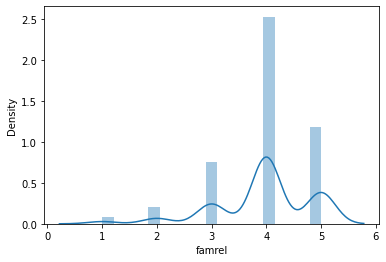

In [87]:
# Свободное время после школы. 11 пропусков заменим на моду
stud.freetime.value_counts(dropna=False)
sns.distplot(stud['famrel'])

In [53]:
stud.freetime = stud['freetime'].fillna(3.0)
stud.freetime.value_counts(dropna=False)

3.0    164
4.0    112
2.0     61
5.0     38
1.0     18
Name: freetime, dtype: int64

In [54]:
# Проведение времени с друзьями. 8 пропусков заменим на моду
stud.goout.value_counts(dropna=False)

3.0    127
2.0     99
4.0     84
5.0     52
1.0     23
NaN      8
Name: goout, dtype: int64

In [55]:
stud.goout = stud['goout'].fillna(3.0)
stud.goout.value_counts(dropna=False)

3.0    135
2.0     99
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

In [56]:
# Состояние здоровья. 15 пропусков. На что заменить пока не понятно. Может быть важным столбцом
stud.health.value_counts(dropna=False)

5.0    137
3.0     89
4.0     62
1.0     47
2.0     43
NaN     15
Name: health, dtype: int64

In [57]:
# Заменим на моду
stud.health = stud['health'].fillna(5.0)
stud.health.value_counts(dropna=False)

5.0    152
3.0     89
4.0     62
1.0     47
2.0     43
Name: health, dtype: int64

In [58]:
# Количество пропущенных занятий. Есть выбросы, 12 пропусков - удалить? Это важный столбец
stud.absences.value_counts(dropna=False)

0.0      111
2.0       60
4.0       52
6.0       31
8.0       21
10.0      17
12.0      12
NaN       12
14.0      11
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [59]:
stud.absences.describe() #Посмотрим статистические значения

count    381.000000
mean       7.270341
std       23.523737
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [60]:
stud.score.value_counts(dropna=False) #Есть выбросы и 6 пропусков. Пропуски удалим. Это самый важный столбец

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     30
40.0     30
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [61]:
stud.score.describe() # Посмотрим статистические значения

count    387.000000
mean      52.273902
std       22.966464
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [62]:
stud['studytime, granular'].value_counts(dropna=False) #Непонятный столбец. Пропуски заменим на моду и проверим на взаимосвязи. 

-6.0     194
-3.0     102
-9.0      63
-12.0     27
 NaN       7
Name: studytime, granular, dtype: int64

In [63]:
stud['studytime, granular'].describe() # Посмотрим статистические значения

count    386.000000
mean      -6.116580
std        2.523528
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

In [64]:
# Заменим пропуски на моду
stud['studytime, granular'] = stud['studytime, granular'].fillna(-6.0)
stud['studytime, granular'].value_counts(dropna=False)

-6.0     201
-3.0     102
-9.0      63
-12.0     27
Name: studytime, granular, dtype: int64

In [65]:
# Произведу созранение в новую переменную датасета без пустых строк по выбранным столбцам, считаю что замена в них будет не целесообразна. В образовании матери пропусков менее 1%, по остальным столбцам нет понимания как заменить без потери смысла
stud_1 = stud.dropna(subset=['score', 'absences', 'Medu'])
display(stud_1.head(10))
stud_1.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,LE3,A,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               373 non-null    object 
 1   sex                  373 non-null    object 
 2   age                  373 non-null    int64  
 3   address              373 non-null    object 
 4   famsize              373 non-null    object 
 5   Pstatus              373 non-null    object 
 6   Medu                 373 non-null    float64
 7   Fedu                 373 non-null    float64
 8   Mjob                 373 non-null    object 
 9   Fjob                 373 non-null    object 
 10  reason               373 non-null    object 
 11  guardian             373 non-null    object 
 12  traveltime           373 non-null    float64
 13  studytime            373 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            373 non-null    obj

In [66]:
# После проверки на выбросы решаю убрать из датасета не только учащегося в возрасте 22, но и учащегося в возрасте 21 год,
# так как он находится на границе выброса и всего один
stud_1 = stud_1.loc[stud_1.age <= 20]

In [67]:
# Проверяю получилось ли удаление
display(stud_1.head(10))
stud_1.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,LE3,A,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               371 non-null    object 
 1   sex                  371 non-null    object 
 2   age                  371 non-null    int64  
 3   address              371 non-null    object 
 4   famsize              371 non-null    object 
 5   Pstatus              371 non-null    object 
 6   Medu                 371 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 371 non-null    object 
 9   Fjob                 371 non-null    object 
 10  reason               371 non-null    object 
 11  guardian             371 non-null    object 
 12  traveltime           371 non-null    float64
 13  studytime            371 non-null    float64
 14  failures             371 non-null    float64
 15  schoolsup            371 non-null    obj

До этого момента я готовила данные для изучения взаимосвязей. Сохранила все столбцы и минимизировала удаления. При этом активно применяла замену на моду или равно распределяла ответы там, где их было всего два варианта - на мой взгляд такой способ наименее исказил содержание. Но это не точно :)

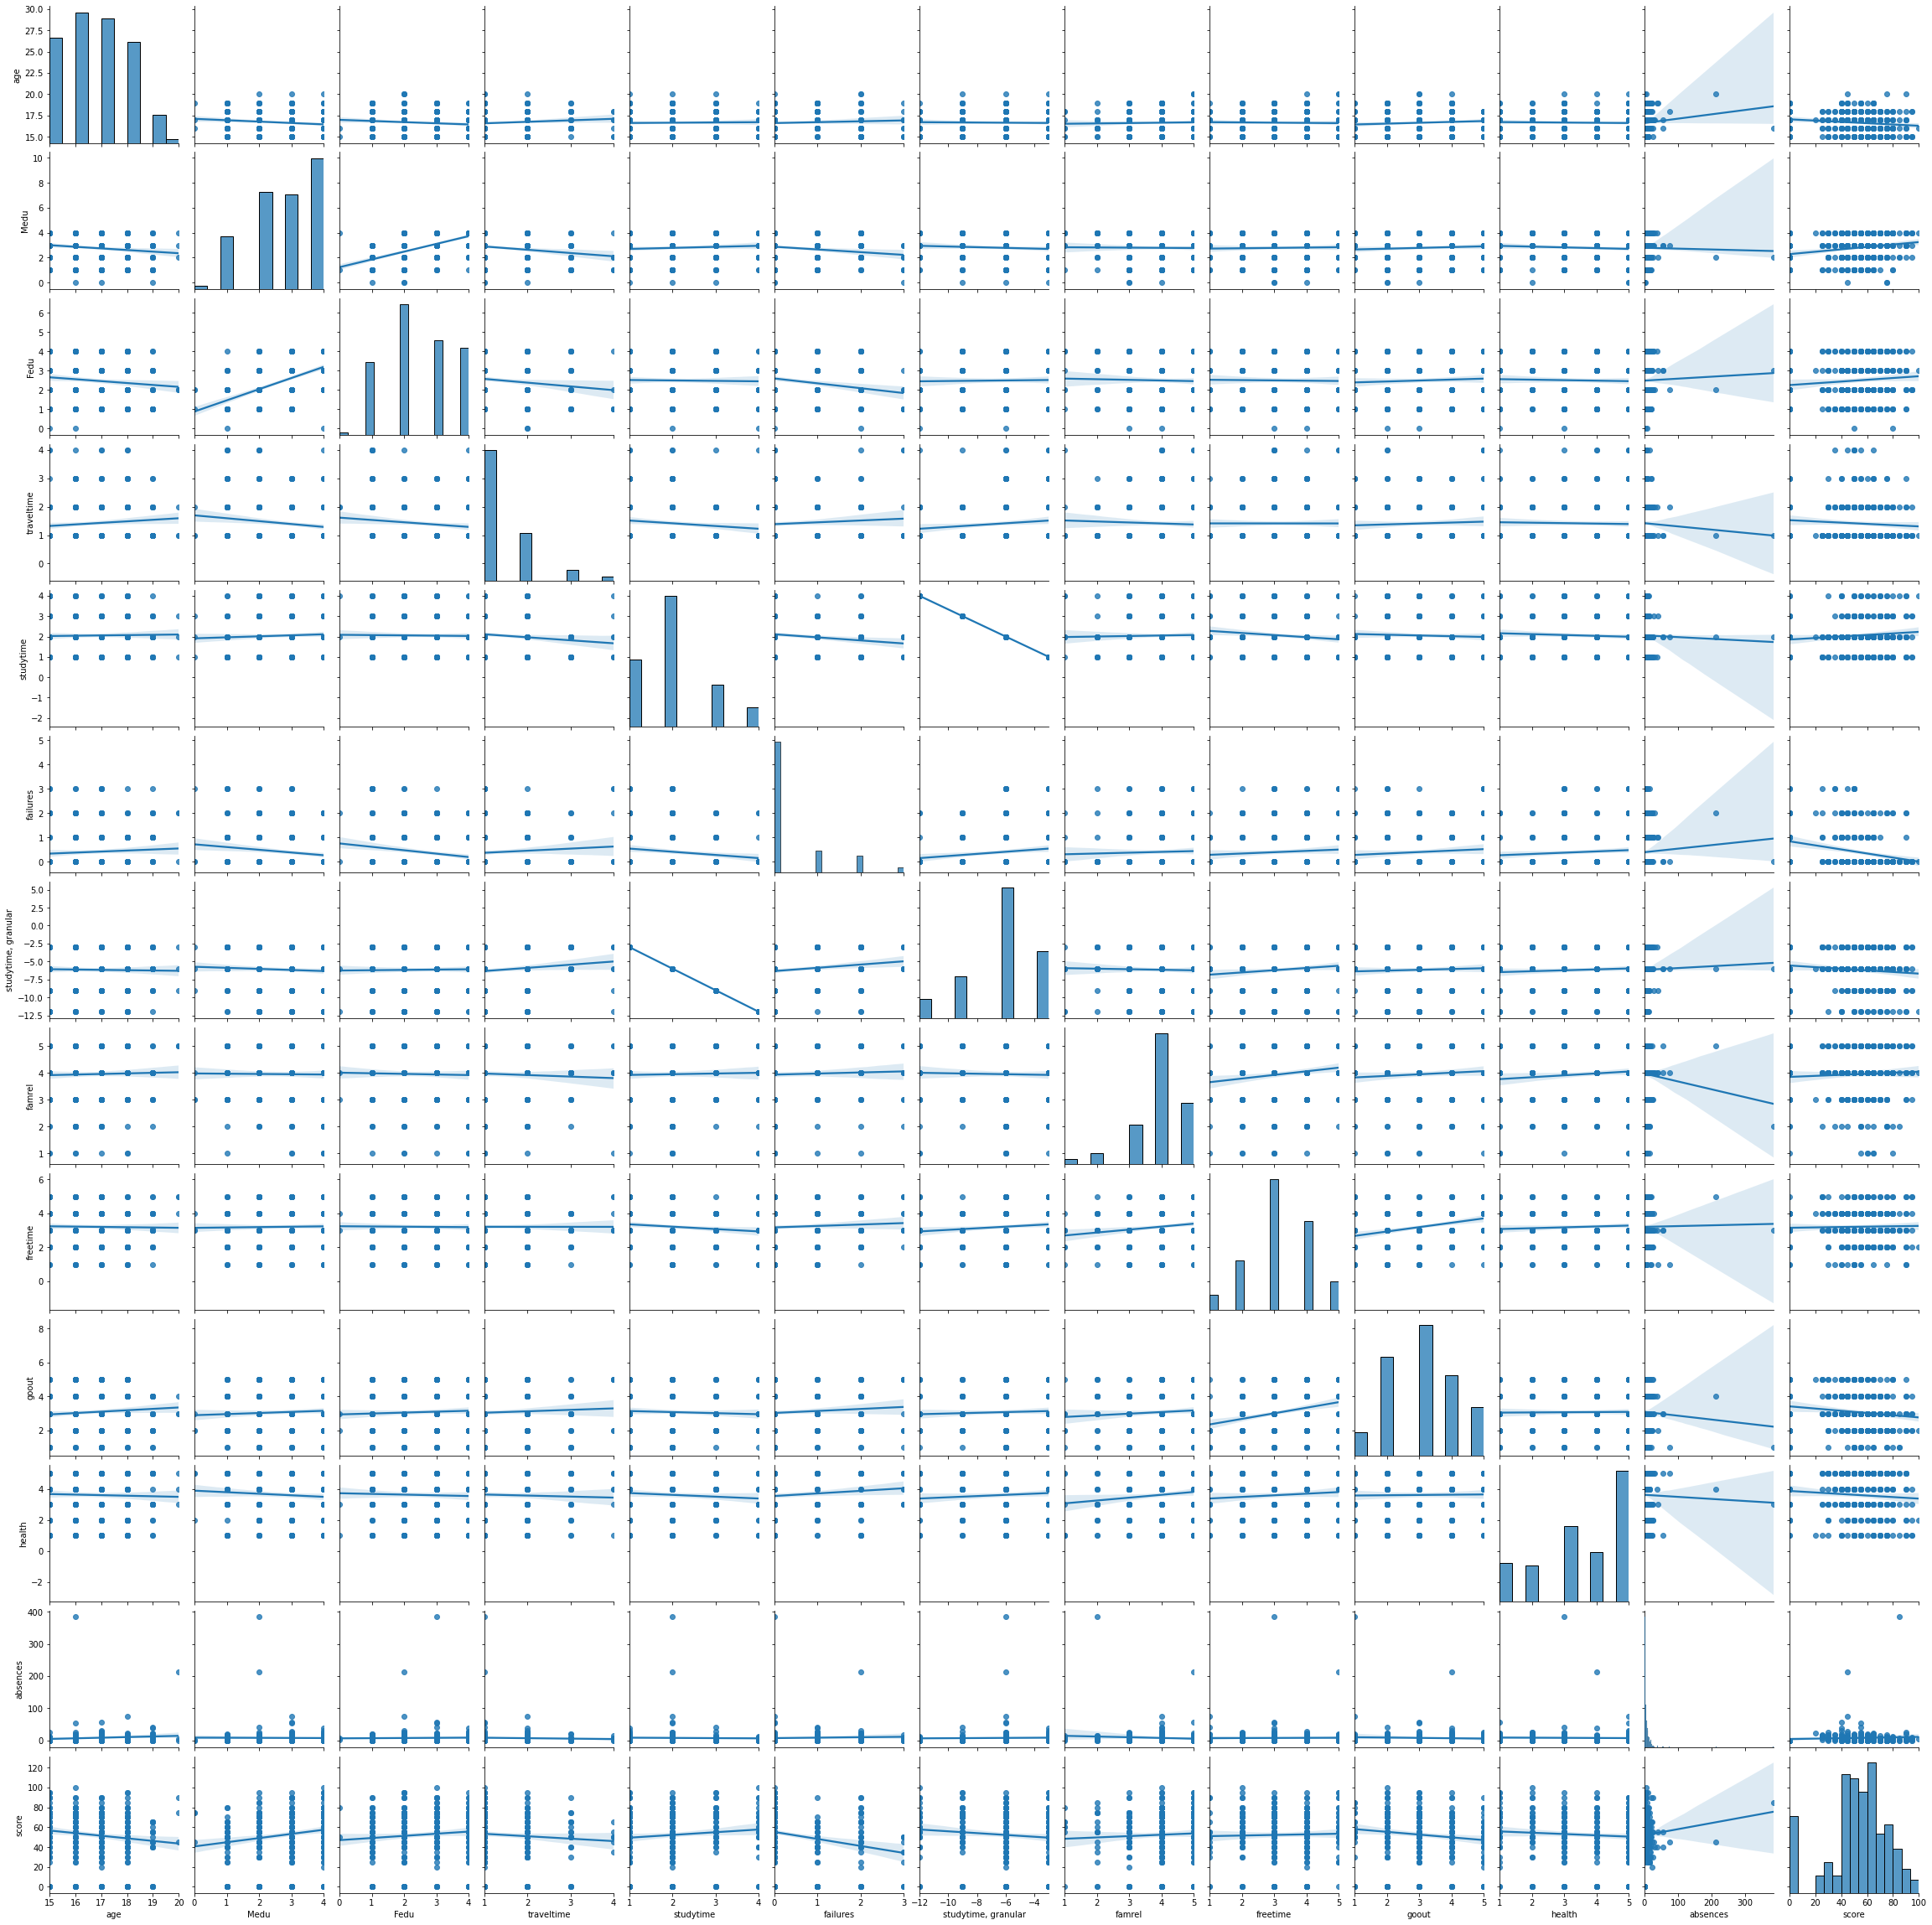

In [68]:
# Посмотрим взаимосвязи на графиках
sns.pairplot(stud_1, kind='reg')

In [69]:
# Поскольку графиков много, то посмотрим корреляцию в таблице
stud_1.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.145056,-0.115850,0.097670,0.021589,0.066072,-0.021589,0.030695,-0.022214,0.090656,-0.031768,0.099286,-0.141156
Medu,-0.145056,1.000000,0.600411,-0.163513,0.064254,-0.156116,-0.064254,-0.012344,0.024803,0.063813,-0.077531,-0.014853,0.201189
Fedu,-0.115850,0.600411,1.000000,-0.125957,-0.017882,-0.188029,0.017882,-0.027086,-0.014324,0.051553,-0.033984,0.022967,0.099429
traveltime,0.097670,-0.163513,-0.125957,1.000000,-0.119538,0.074467,0.119538,-0.044697,-0.000676,0.052502,-0.032323,-0.039758,-0.073377
studytime,0.021589,0.064254,-0.017882,-0.119538,1.000000,-0.140285,-1.000000,0.025822,-0.120254,-0.047738,-0.070881,-0.023926,0.101682
failures,0.066072,-0.156116,-0.188029,0.074467,-0.140285,1.000000,0.140285,0.036412,0.067685,0.083574,0.093414,0.044227,-0.242281
"studytime, granular",-0.021589,-0.064254,0.017882,0.119538,-1.000000,0.140285,1.000000,-0.025822,0.120254,0.047738,0.070881,0.023926,-0.101682
famrel,0.030695,-0.012344,-0.027086,-0.044697,0.025822,0.036412,-0.025822,1.000000,0.153614,0.075270,0.114325,-0.080834,0.051631
freetime,-0.022214,0.024803,-0.014324,-0.000676,-0.120254,0.067685,0.120254,0.153614,1.000000,0.291204,0.072898,0.011057,0.025784
goout,0.090656,0.063813,0.051553,0.052502,-0.047738,0.083574,0.047738,0.075270,0.291204,1.000000,0.013824,-0.048854,-0.134183


На текущий момент столбцами наиболее влияющими я бы выбрала: Medu, studytime, Fedu - с положительной корреляцией. Интересно посмотреть и на отрицательную: age, failures, goout. То есть, чем больше возраст, внеучебных неудач, а также чем больше учащийся проводит времени с друзьями, тем ниже его оценки. Обратная корреляция, пожалуй, даже более выражена, чем прямая. Исключение - образование матери.
Отдельно выделю столбец studytime, granular - из полученной таблице видно, что он имеет обратную зависимость с studytime. До конца так и не понятно как он рассчитывался. 

In [70]:
# Еще раз посмотрю на оценки в новойм датасете
stud_1.score.describe()

count    371.000000
mean      52.331536
std       22.789176
min        0.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [-21.5, 107.5].


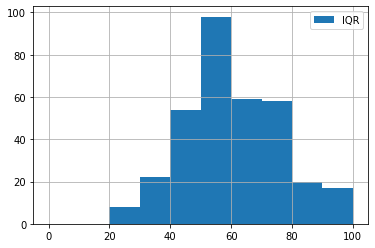

In [71]:
IQR_score = stud_1.score.quantile(0.75) - stud_1.score.quantile(0.25)
perc25_score = stud_1.score.quantile(0.25)
perc75_score = stud_1.score.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25_score),
'75-й перцентиль: {},'.format(perc75_score),
"IQR: {}, ".format(IQR_score),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR_score, l=perc75_score + 1.5*IQR_score))
 
stud_1.score.loc[stud_1.score.between(
perc25_score - 1.5*IQR_score,
perc75_score + 1.5*IQR_score)].hist(bins=10, range = (0, 100), label = 'IQR')
 
plt.legend()

In [88]:
# Посмотрю взаимосвязи в датасете с оценками ниже среднего
stud_low = stud_1.loc[stud_1.score<53]
display(stud_low.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
10,GP,F,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0
17,GP,F,16,U,GT3,T,3.0,3.0,other,other,reputation,mother,3.0,2.0,0.0,yes,yes,no,yes,yes,-6.0,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,no,yes,yes,-3.0,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
19,GP,M,16,U,LE3,T,4.0,3.0,health,other,home,father,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,yes,no,3.0,1.0,3.0,5.0,4.0,50.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0


In [89]:
stud_low.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.118322,-0.057697,0.038206,-0.120381,0.005553,0.120381,0.023880,0.033489,0.070162,0.029523,0.225825,-0.059356
Medu,-0.118322,1.000000,0.611454,-0.109066,0.090755,-0.178856,-0.090755,-0.012540,0.071877,0.123476,-0.107580,0.044441,0.066845
Fedu,-0.057697,0.611454,1.000000,-0.063625,0.063292,-0.190700,-0.063292,-0.072869,-0.055988,0.053747,-0.064619,0.011849,-0.040444
traveltime,0.038206,-0.109066,-0.063625,1.000000,-0.196266,0.023739,0.196266,-0.005382,0.012861,0.021443,-0.007012,-0.041185,0.076945
studytime,-0.120381,0.090755,0.063292,-0.196266,1.000000,-0.207728,-1.000000,-0.040782,-0.111074,-0.092043,-0.067141,-0.040182,0.024815
failures,0.005553,-0.178856,-0.190700,0.023739,-0.207728,1.000000,0.207728,-0.039716,0.071947,0.002736,0.149402,0.090799,-0.155381
"studytime, granular",0.120381,-0.090755,-0.063292,0.196266,-1.000000,0.207728,1.000000,0.040782,0.111074,0.092043,0.067141,0.040182,-0.024815
famrel,0.023880,-0.012540,-0.072869,-0.005382,-0.040782,-0.039716,0.040782,1.000000,0.105371,0.159819,0.031765,0.115733,0.081636
freetime,0.033489,0.071877,-0.055988,0.012861,-0.111074,0.071947,0.111074,0.105371,1.000000,0.311313,0.040619,0.101025,0.020219
goout,0.070162,0.123476,0.053747,0.021443,-0.092043,0.002736,0.092043,0.159819,0.311313,1.000000,0.011384,0.047879,-0.006818


Здесь выделяется связь с количеством пропущенных занятий (absences), снизилось влияние ранее обозначенных параметров (уменьшилось в разы).

In [74]:
# Посмотрим, а что с учащимися, у которых оценки выше среднего
stud_high = stud_1.loc[stud_1.score>=56]
stud_high.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.231864,-0.166656,0.129079,0.178136,0.035473,-0.178136,0.070250,-0.029841,0.087653,-0.030881,0.008507,-0.096117
Medu,-0.231864,1.000000,0.527949,-0.210139,0.026438,-0.052536,-0.026438,-0.006199,-0.001604,0.049364,-0.056070,-0.068594,0.237570
Fedu,-0.166656,0.527949,1.000000,-0.125212,-0.122585,-0.115931,0.122585,-0.011230,0.043375,0.114222,-0.039776,0.019906,-0.009141
traveltime,0.129079,-0.210139,-0.125212,1.000000,0.004498,0.078878,-0.004498,-0.072673,-0.046887,0.032347,-0.080232,-0.047793,-0.094765
studytime,0.178136,0.026438,-0.122585,0.004498,1.000000,-0.088280,-1.000000,0.041823,-0.111925,-0.002467,-0.082577,-0.021086,0.144291
failures,0.035473,-0.052536,-0.115931,0.078878,-0.088280,1.000000,0.088280,0.114225,0.142268,0.147224,0.074652,-0.010794,-0.074701
"studytime, granular",-0.178136,-0.026438,0.122585,-0.004498,-1.000000,0.088280,1.000000,-0.041823,0.111925,0.002467,0.082577,0.021086,-0.144291
famrel,0.070250,-0.006199,-0.011230,-0.072673,0.041823,0.114225,-0.041823,1.000000,0.179974,-0.003290,0.228012,-0.190119,0.118587
freetime,-0.029841,-0.001604,0.043375,-0.046887,-0.111925,0.142268,0.111925,0.179974,1.000000,0.240268,0.141524,-0.018889,-0.028078
goout,0.087653,0.049364,0.114222,0.032347,-0.002467,0.147224,0.002467,-0.003290,0.240268,1.000000,-0.066059,-0.131396,-0.079096


Существенно выражена корреляция с Medu, studytime, famrel. 

Далее посмотрим номинативные переменные.

In [75]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(x=column, y='score',
                data=stud_1.loc[stud_1.loc[:, column].isin(
                    stud_1.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

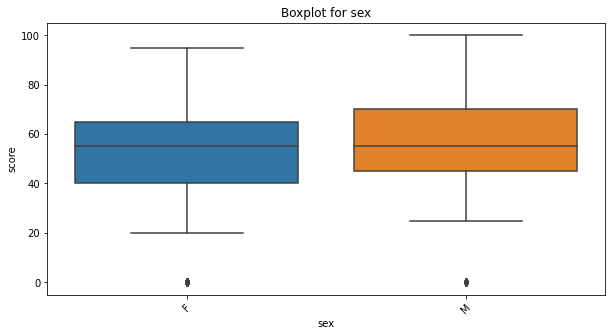

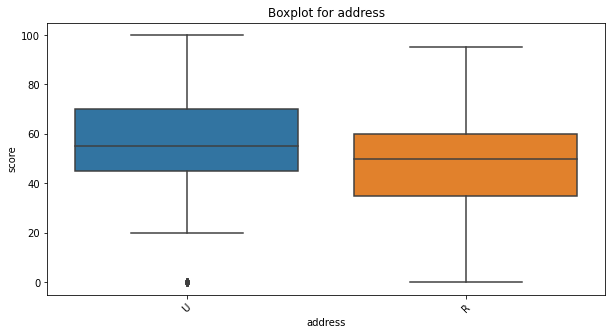

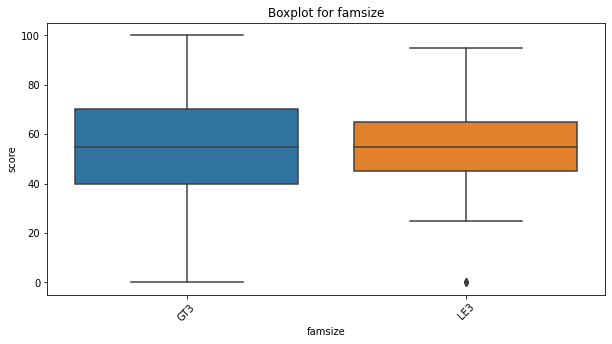

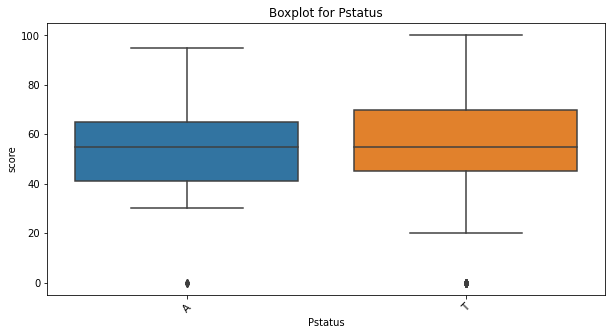

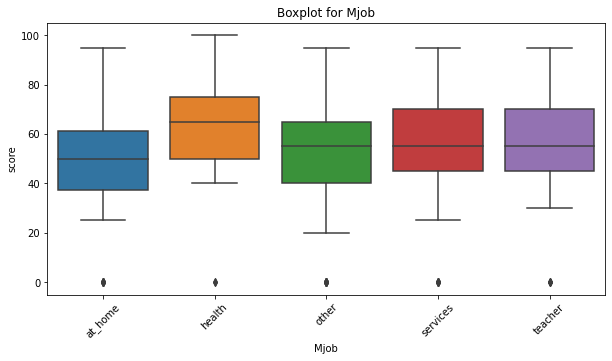

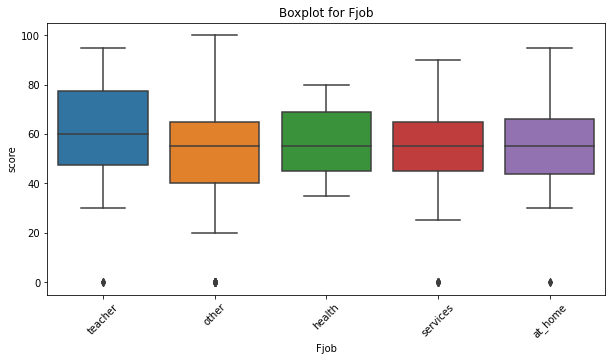

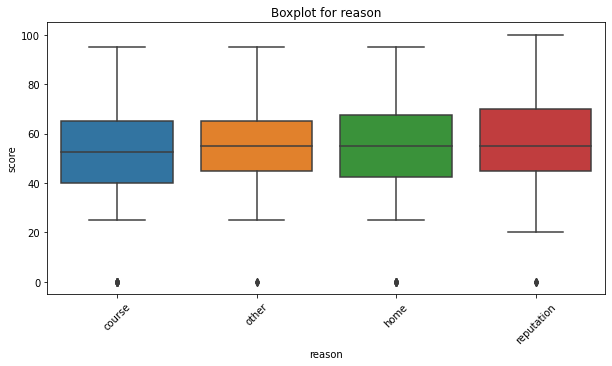

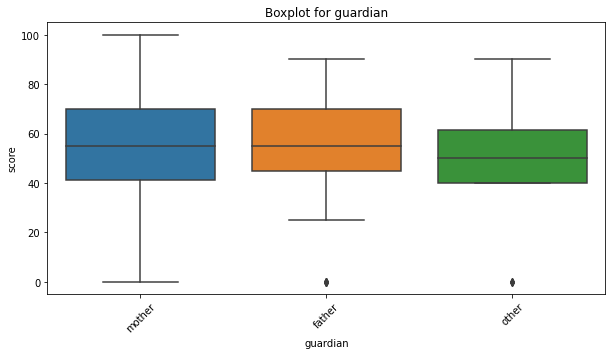

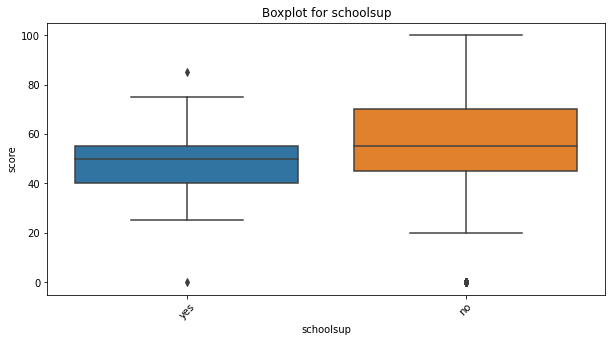

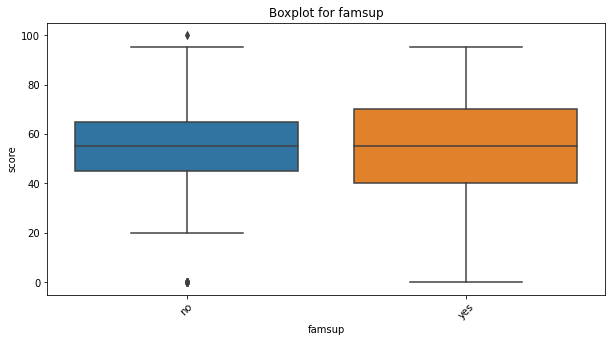

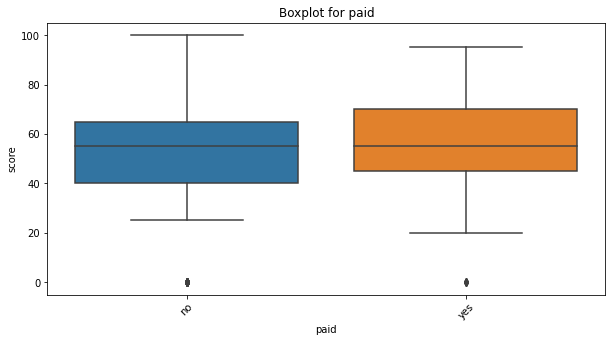

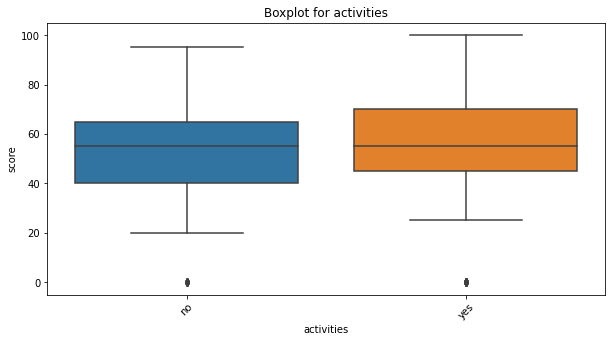

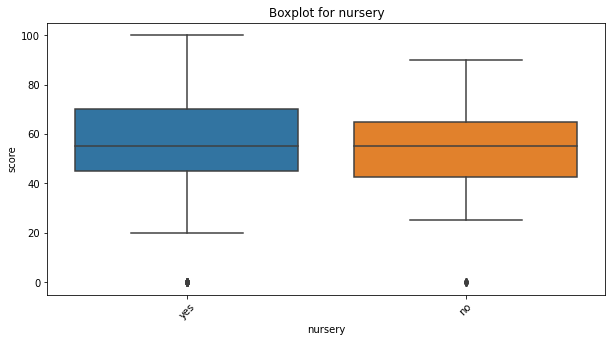

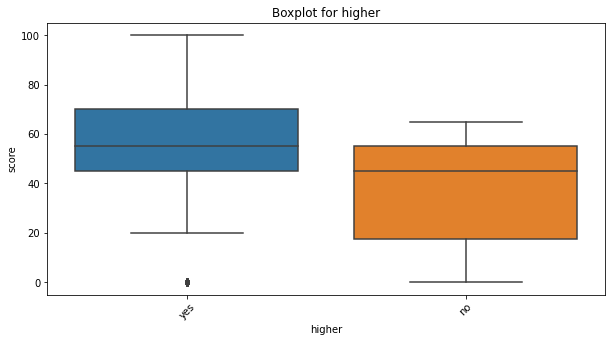

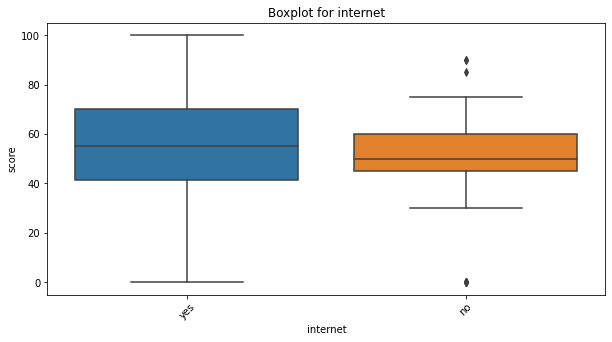

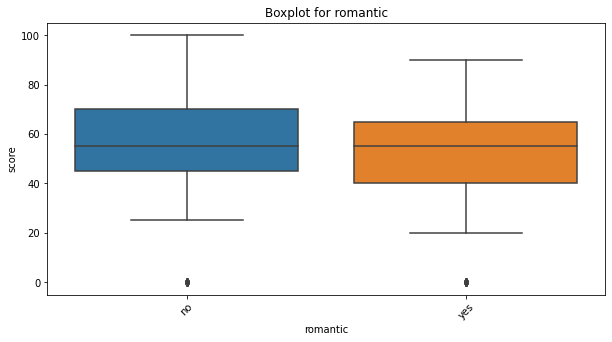

In [76]:
for col in ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [77]:
def get_stat_dif(column):
    cols = stud_1.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_1.loc[stud_1.loc[:, column] == comb[0], 'score'],
                     stud_1.loc[stud_1.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [78]:
for col in ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Выявлено пять влияющих параметров

In [82]:
# Посмотрим на выборку, где оценки ниже среднего
def get_boxplot_low(column):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(x=column, y='score',
                data=stud_low.loc[stud_low.loc[:, column].isin(
                    stud_low.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

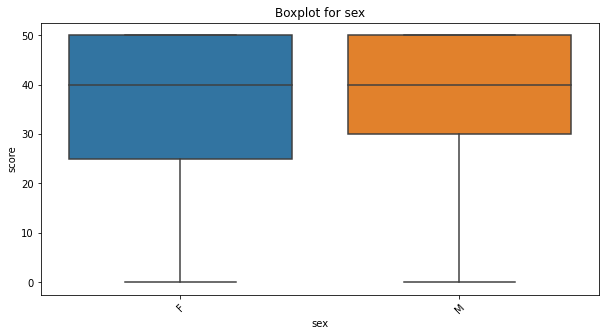

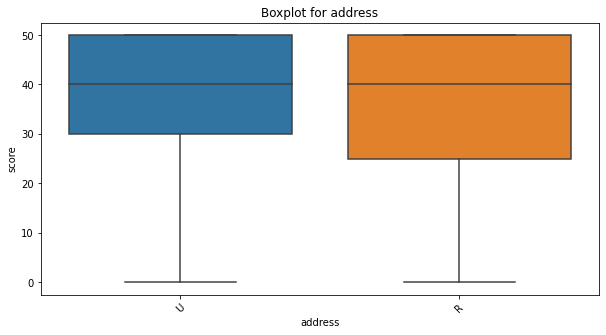

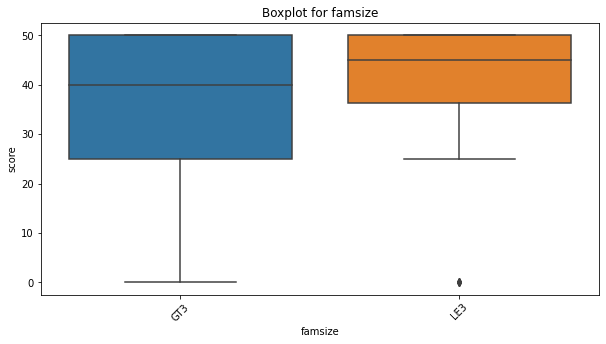

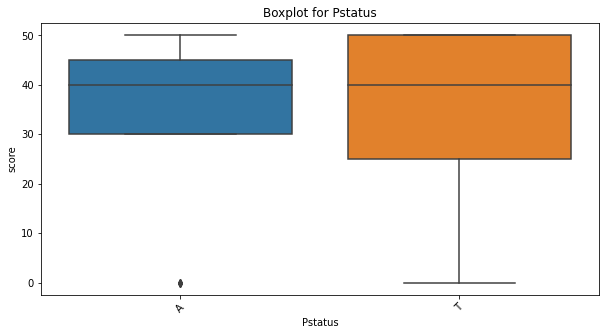

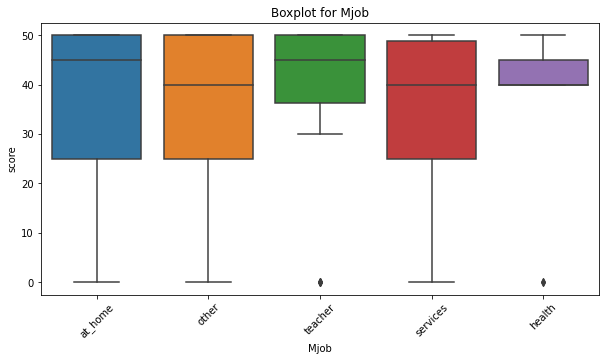

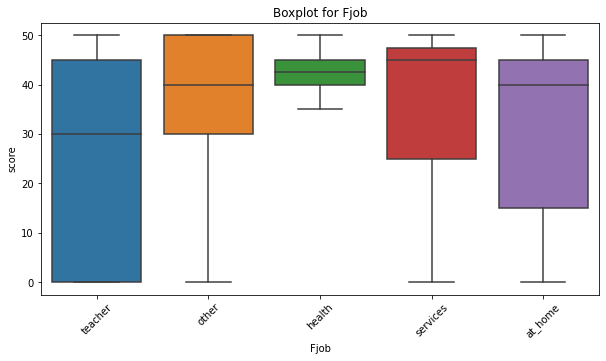

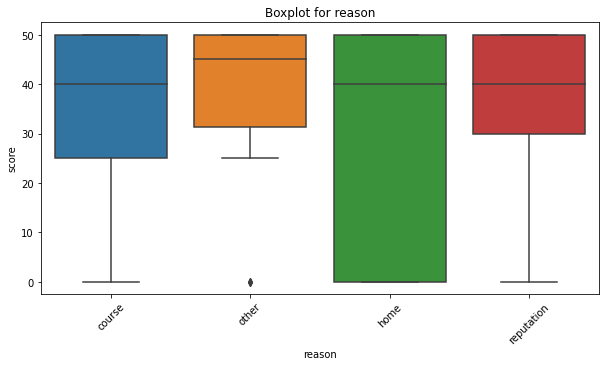

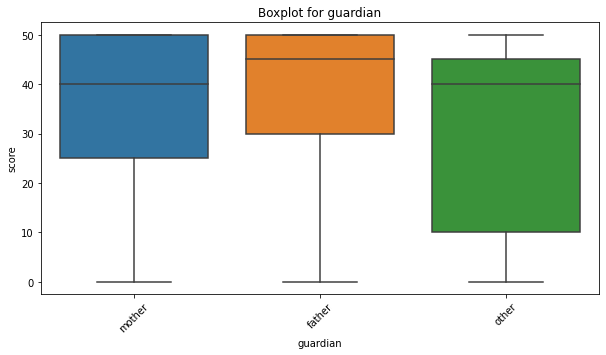

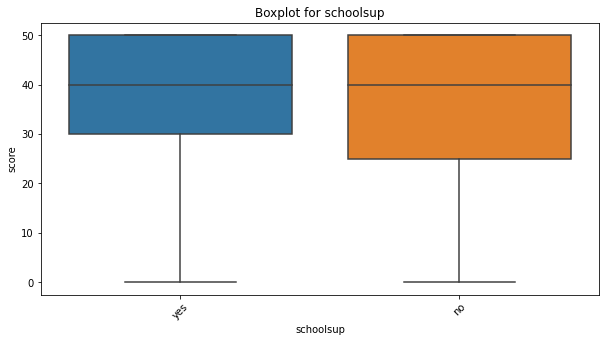

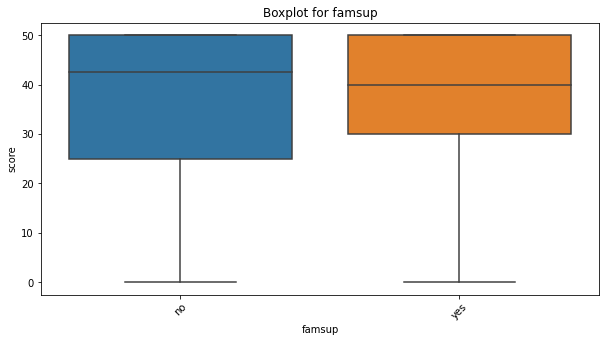

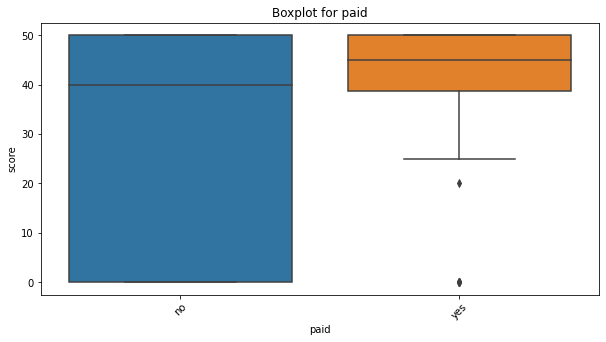

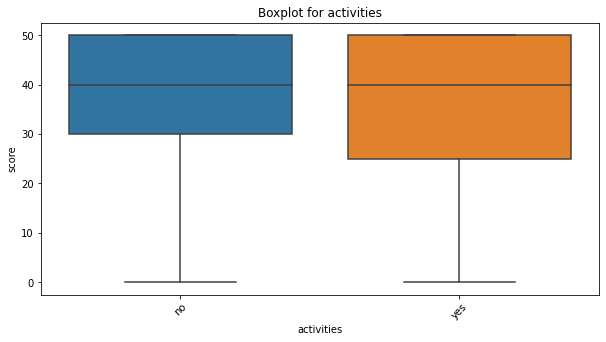

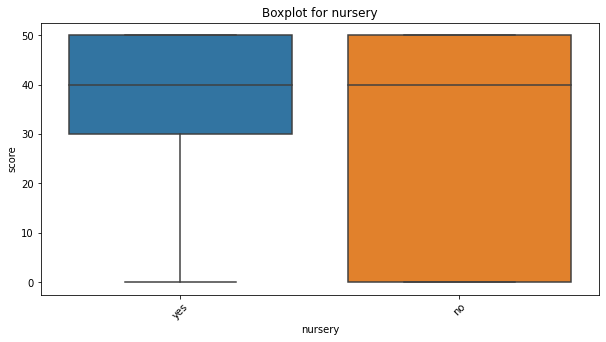

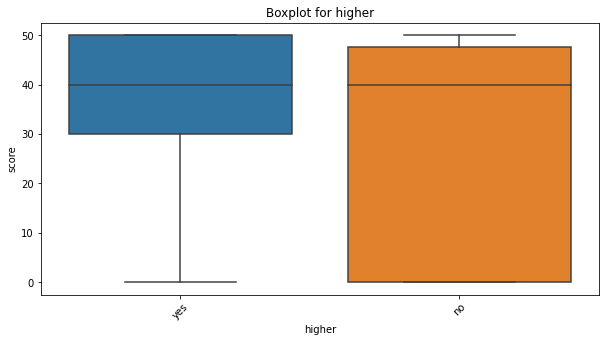

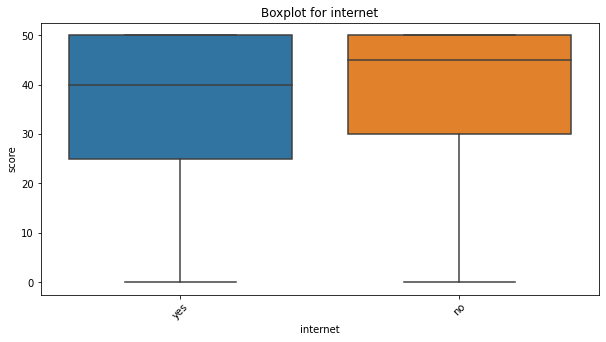

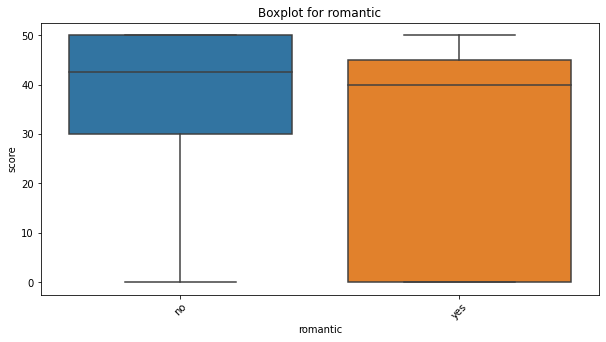

In [83]:
for col in ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot_low(col)

In [84]:
def get_stat_low(column):
    cols = stud_low.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_low.loc[stud_low.loc[:, column] == comb[0], 'score'],
                     stud_low.loc[stud_low.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [85]:
for col in ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_low(col)

Найдены статистически значимые различия для колонки famsize
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки romantic


Здесь выявилось пересечение с общим датасетом - параметр romantic. И появилось два дополнительных - famsize и paid. У этой выборки оценки лучше у тех, кто из небольшой семьи, ходит на платные занятия и не имеет романтических отношений.

In [86]:
# Посмотрим на выборку учащихся с оценками выше среднего
def get_stat_high(column):
    cols = stud_high.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_high.loc[stud_high.loc[:, column] == comb[0], 'score'],
                     stud_high.loc[stud_high.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_high(col)

Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [ ]:
Выявляется тот же параметр - romantic, дополнение - желание получить высшее образование (higher)

Общие выводы:
Считаю наиболее влияющими на успеваемость по математике среди учащихся в возрасте 15-22 лет следующие параметры:
Medu, studytime, Fedu
age, failures, goout
Дополнительно важные параметры:
absences
famrel
Из номинативных:
sex address Mjob higher romantic
famsize paid

Поскольку некоторые из этих столбцов были изменены (заменены пропуски), то для модели рекоменду оставить: Medu, absences, age - нет измененных данных, studytime, failures, goout, higher, romantic, sex, address, higher, romantic, famsize, paid. 


In [90]:
stud_for_model=stud_1.loc[:,['Medu', 'absences', 'age', 'studytime', 'failures', 'goout', 'higher', 'romantic', 'sex', 'address', 'higher', 'romantic', 'famsize', 'paid']]
stud_for_model.head()

,Medu,absences,age,studytime,failures,goout,higher,romantic,sex,address,higher,romantic,famsize,paid
0,4.0,6.0,18,2.0,0.0,4.0,yes,no,F,U,yes,no,GT3,no
1,1.0,4.0,17,2.0,0.0,3.0,yes,no,F,U,yes,no,GT3,no
2,1.0,10.0,15,2.0,3.0,2.0,yes,no,F,U,yes,no,LE3,no
3,4.0,2.0,15,3.0,0.0,2.0,yes,yes,F,U,yes,yes,GT3,yes
4,3.0,4.0,16,2.0,0.0,2.0,yes,no,F,U,yes,no,GT3,yes
